# Indicator Method

In [1]:
import pandas as pd
import numpy as np
#import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/AK/Desktop/project/diabetes.csv")

In [3]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

# Replacing null values by zero

In [4]:
df1=df.replace(np.nan,0)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [5]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

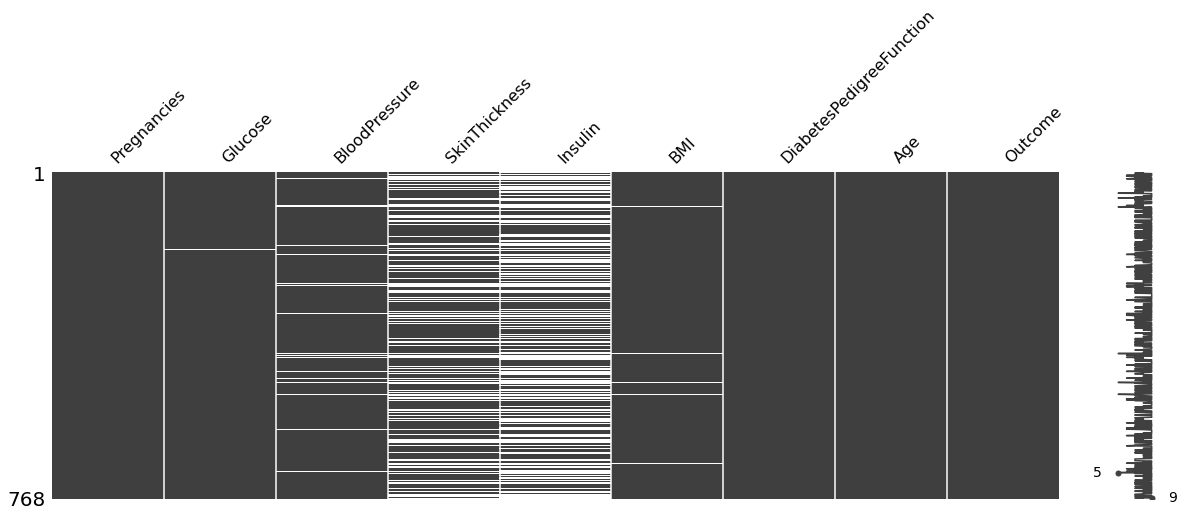

In [6]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))

In [7]:
x=df1.iloc[:,:8]
y=df1[['Outcome']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [9]:
#evaluating model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [10]:
knn.fit(x_train,y_train)

<ipython-input-10-17b0ab828d68>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [11]:
#Predict the respose for test dataset
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [12]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confMat=confusion_matrix(y_test,y_pred)
confMat

array([[127,  23],
       [ 42,  39]], dtype=int64)

In [13]:
#import scikit-learn metrics module for aaccuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
#model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7186147186147186


In [14]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_test,y_pred)
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  0.2813852813852814
MSE1:  0.2813852813852814
RMSE1:  0.5304576150695561


# Evaluating using logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lm=LogisticRegression(solver='liblinear',random_state=101).fit(x_train,y_train)

print("R square : ", lm.score(x_train,y_train))

R square :  0.776536312849162


C:\Users\AK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
